<h1 align="center">Refuerzo: impedancia eléctrica</h1>
<div align="right">Por David A. Miranda, PhD<br>2020</div>
<h2>1. Importa las librerias</h2>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2. Sigue los siguientes pasos para que realices un refuerzo de lo aprendido:

+ **Paso 1**: observar el [video explicativo](https://youtu.be/Il2dNcMS3es).
+ **Paso 2**: ejecuta la siguiente celda.
+ **Paso 3**: observa las señales de voltaje y corriente de la figura.
+ **Paso 4**: con lápiz y papel, calcule el valor de la impedancia y exprésala de la forma trigonométrica $[Z = |Z| cos(\phi) + j |Z| sin(\phi)]$ y  polar $(Z = |Z|e^{j\phi})$.  
+ **Paso 5**: registre en una tabla el valor de la impedancia y la frecuencia de la señal de excitación.
+ **Paso 6**: repita los pasos 2 a 5 por lo menos 15 veces.
+ **Paso 7**: grafica la parte real de la impdancia en función de la frecuencia.
+ **Paso 8**: grafica la parte imaginaria de la impdancia en función de la frecuencia.
+ **Paso 9**: grafica la magnitud de la impdancia en función de la frecuencia.
+ **Paso 7**: grafica la fase de la impdancia en función de la frecuencia.
+ **Paso 8**: compara las gráficas obtenidas con las mostradas en el ítem 3 (al final de este *notebook*).

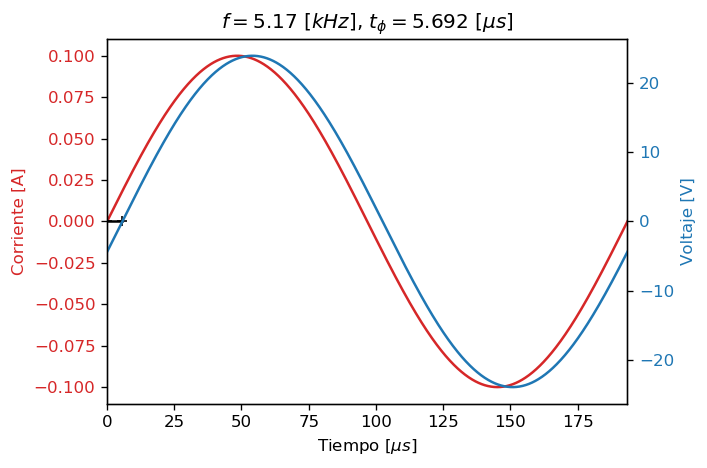

In [2]:
f = 10**np.random.uniform(low=3, high=6)
def impedance(f):
    return 100 + 150/(1 + 2j*np.pi*f*10e-6)

Z = impedance(f)
phi = np.angle(Z)
Z_abs = np.abs(Z)
w = 2*np.pi*f
t_phi = 1e6*np.abs(phi/w)
t = np.linspace(0, 1/f, 1000)
Io = 0.1 # A 
i = Io * np.sin(w*t)
v = Z_abs*Io*np.sin(w*t + phi)

fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel(r'Tiempo $[\mu s]$')
ax1.set_ylabel('Corriente [A]', color=color)
ax1.plot(1e6*t, i, color=color)
ax1.plot([0, t_phi], 2*[0], '+-k')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Voltaje [V]', color=color)
ax2.plot(1e6*t, v, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax = plt.axis()
plt.axis([min(1e6*t), max(1e6*t), ax[2], ax[3]])
plt.title(r'$f=%0.2f$ $[k Hz]$, $t_{\phi}=%0.3f$ [$\mu s$]' % (1e-3*f, t_phi))
fig.tight_layout()

## 3. Diagramas de Bode de la impedancia

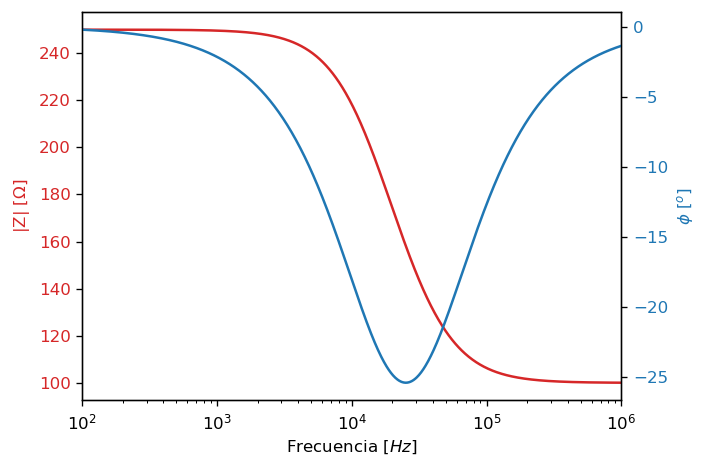

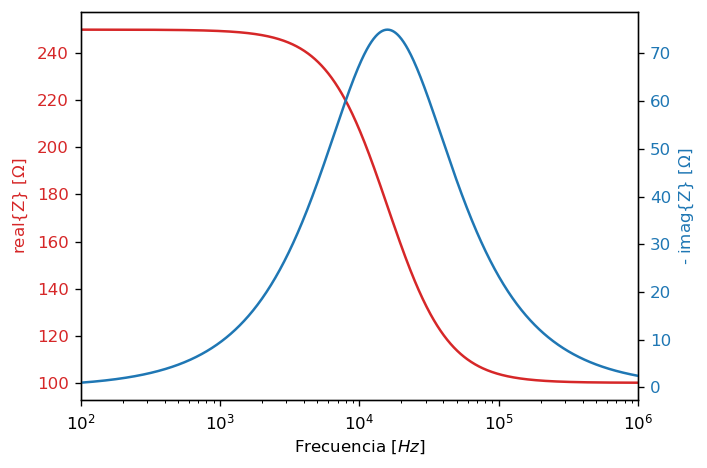

In [3]:
f = np.logspace(2, 6, 1000)
Z = impedance(f)

fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel(r'Frecuencia $[Hz]$')
ax1.set_ylabel('|Z| [$\Omega$]', color=color)
ax1.semilogx(f, np.abs(Z), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('$\phi$ [$^o$]', color=color)
ax2.semilogx(f, 180*np.angle(Z)/np.pi, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax = plt.axis()
_ = plt.axis([min(f), max(f), ax[2], ax[3]])
fig.tight_layout()

fig, ax1 = plt.subplots(dpi=120)
color = 'tab:red'
ax1.set_xlabel(r'Frecuencia $[Hz]$')
ax1.set_ylabel(r'real{Z} [$\Omega$]', color=color)
ax1.semilogx(f, Z.real, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'- imag{Z} [$\Omega$]', color=color)
ax2.semilogx(f, -Z.imag, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax = plt.axis()
_ = plt.axis([min(f), max(f), ax[2], ax[3]])
fig.tight_layout()

End!